### This notebook generate a figure illustraing the role of an increasing $\mu$ in the interaction of two species and so on the edges of a Networks.

In [10]:
##Packages##
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
##figures inline##
%matplotlib inline
plt.rc("figure",figsize=(16,10))

We start to define the basic functions of ours system

In [20]:
def fitness(A,mu=1):
    """Computation of the fitnesses matrix of the reducted model.
    A is the matrix of interaction and mu is the ratio I/D
    """
    n=len(A)
    return np.array(mu*(A.T-A)+A.T-np.matrix(np.ones((n,1)))*np.matrix(np.diagonal(A)))
def fitness_dual(A,mu=1):
    #Definition of the fitness for n=2#
    lambda01=mu*(A[1,0]-A[0,1])+A[1,0]-A[1,1]
    lambda10=mu*(A[0,1]-A[1,0])+A[0,1]-A[0,0]
    return lambda01,lambda10

This cell provide the network

In [12]:
def network(LL):
    """This use the package networkx
    return the graph G from a given fitnesses matrix LL"""
    if LL is list :
        LL=np.array(LL)
    LL=LL-np.diag(np.diag(LL)) # be sure that the self fitness is zero
    G=nx.DiGraph()
    n=len(LL)
    nodes=['{}'.format(i+1) for i in range(n)]
    G.add_nodes_from(nodes)
    pair=[(i,j) for j in range(n) for i in range(j) 
           if LL[i,j] !=0 or LL[j,i] !=0  ]
    edges=[('{}'.format(x[0]+1),'{}'.format(x[1]+1)) for x in pair]
    G.add_edges_from(edges)
    for (i,j),(a,b) in zip(pair,G.edges):
        classe='degenerate'
        if LL[i,j]<0 and LL[j,i]<0: G[a][b]['type']='bist'
        elif LL[i,j]>0 and LL[j,i]>0: G[a][b]['type']='coex'
        elif LL[i,j]<0 and not LL[j,i]<0: G[a][b]['type']='excl_'+b
        elif not LL[i,j]<0 and LL[j,i]<0: G[a][b]['type']='excl_'+a
        #print(classe)
    return G
def net_draw(G,**kwargs):
    """plot the graph G
    kwargs as the following entry :
    - nodes : z, the size of the nodes. Default is 100
    -ax= plot on the curent ax. default is None"""
    ax=kwargs.pop('ax',None)#name of axis
    if ax is None : fig,ax=plt.subplots()
    zz=np.array(kwargs.pop('nodes',[1/G.number_of_nodes()]*G.number_of_nodes()))#size of nodes
    edges_size=kwargs.pop('edges_size',None)#size of edges
    fs=kwargs.pop('font_size',10)#size of font
    #topology of the graph
    pos=nx.layout.circular_layout(G)
    nx.draw_networkx(G,pos=pos,
            node_size=1000*zz+0.01,node_color='grey',alpha=1,
           edgelist=[], ax=ax,font_size=fs)
    ##definitions of the edges by types
    edgecoex,edgebist,edgeexclui,edgeexcluj=[],[],[],[]
    edgecoex_size,edgebist_size,edgeexclui_size,edgeexcluj_size=[],[],[],[]
    for i,j in G.edges :
        
        if G[i][j]['type']=='coex':
            edgecoex.append((i,j))
            edgecoex_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
        elif G[i][j]['type']=='bist':
            edgebist.append((i,j))
            edgebist_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
        elif G[i][j]['type']=='excl_'+i:
            edgeexclui.append((i,j))
            edgeexclui_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
        elif G[i][j]['type']=='excl_'+j:
            edgeexcluj.append((j,i))
            edgeexcluj_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
    ##size of the edges
    if edges_size=='ztype' : print('adaptative edges width')
    elif edges_size==None : 
        edgecoex_size=5
        edgebist_size=5
        edgeexclui_size=[5]*len(edgeexclui)
        edgeexcluj_size=[5]*len(edgeexcluj)
    else: 
        edgecoex_size=edges_size
        edgebist_size=edges_size
        edgeexclui_size=[edges_size]*len(edgeexclui)
        edgeexcluj_size=[edges_size]*len(edgeexcluj)
    ###final ploting###
    ##coexistence edges##
    nx.draw_networkx_edges(G,pos=pos,
                           edgelist=edgecoex,
                           edge_color='red',
                           width=edgecoex_size,
                           arrows=True,
                           arrowsize=0.001,
                           alpha=1,
                           node_size=1000,
                           #connectionstyle='Arc3, rad=0.1',
                          ax=ax)
    ##bistable edges##
    nx.draw_networkx_edges(G,pos=pos,
                           edgelist=edgebist,
                           width=edgebist_size,
                           edge_color='blue',
                           arrows=True,
                           arrowsize=0.001,
                           alpha=1,
                           node_size=1000,
                           #connectionstyle='Arc3, rad=0.1',
                          ax=ax)
    ##exclusion edges##
    for edg,edg_size in zip(edgeexclui+edgeexcluj,edgeexclui_size+edgeexcluj_size):
        nx.draw_networkx_edges(G,pos=pos,
                               width=[edg_size],
                               edgelist=[edg],
                               edge_color='grey',
                               #style='dotted',
                               arrowsize=10*edg_size,
                               arrowstyle='-|>',
                               alpha=0.8,
                               node_size=1000,
                               #connectionstyle="angle3,angleA=-45,angleB=45",
                               ax=ax)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])

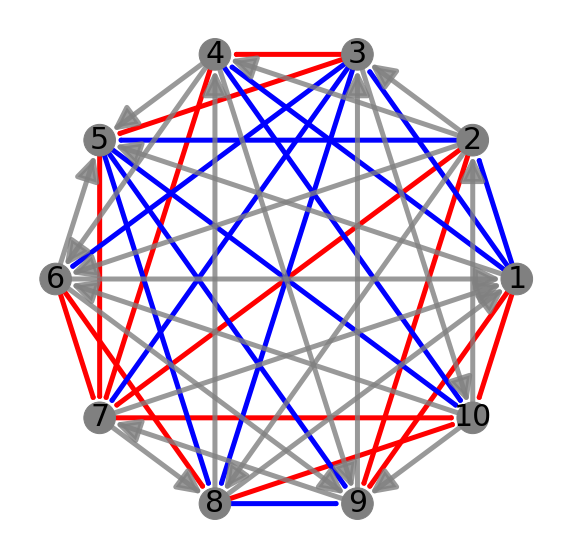

In [13]:
##an exampl of such a graph##
fig,ax=plt.subplots(figsize=(10,10))
n=10
LL=2*np.random.random((n,n))-1
#LL=[[0,-1,1],[1,0,-1],[-1,1,0]]
G=network(LL)
net_draw(G,ax=ax,edges_size=None,nodes=[1]*10,font_size=30)


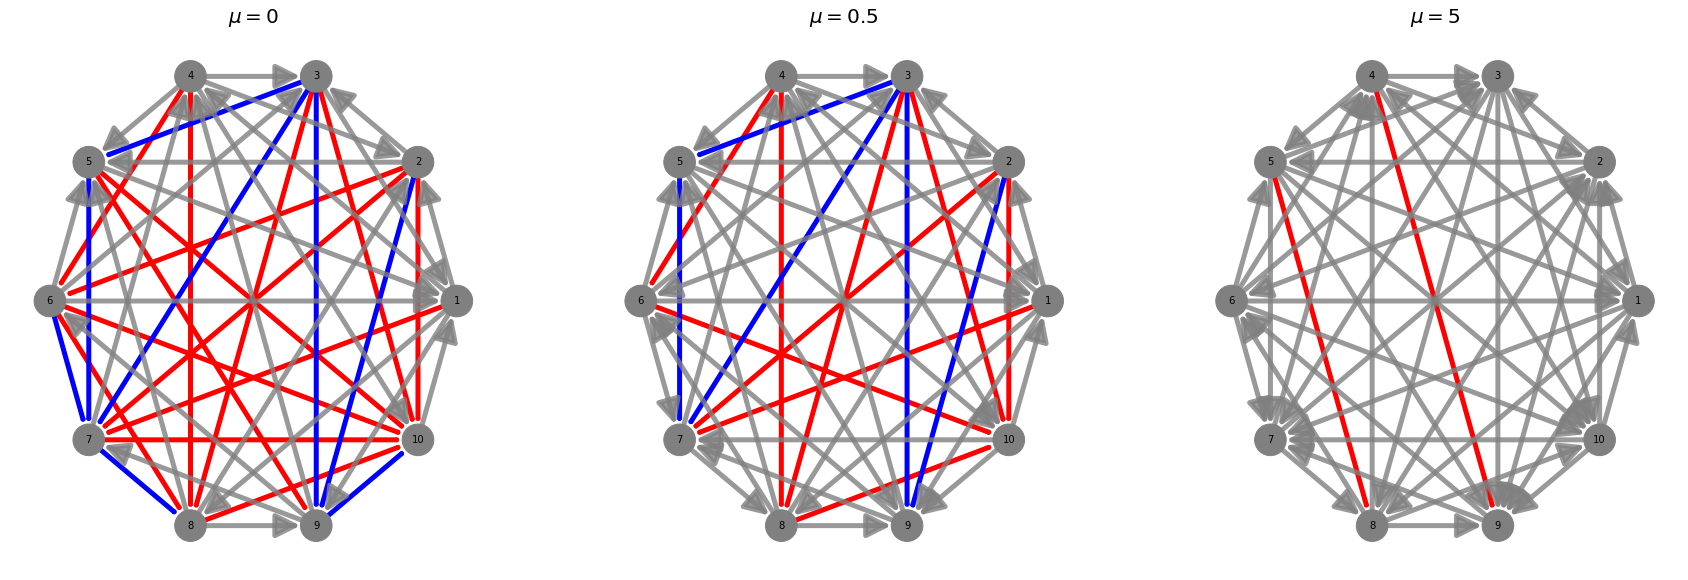

In [14]:
##an example of 3 graph with only mu varying##
n=10
fig,AX=plt.subplots(ncols=3,figsize=(30,10))
MU=[0,0.5,5]
A=np.random.normal(0,1,(n,n))
for mu,ax in zip(MU,AX):
    LL=fitness(A,mu);
    G=network(LL);
    net_draw(G,ax=ax,edges_size=None,nodes=[1]*10);
    ax.set_title(f'$\mu=${mu}',fontsize=20);

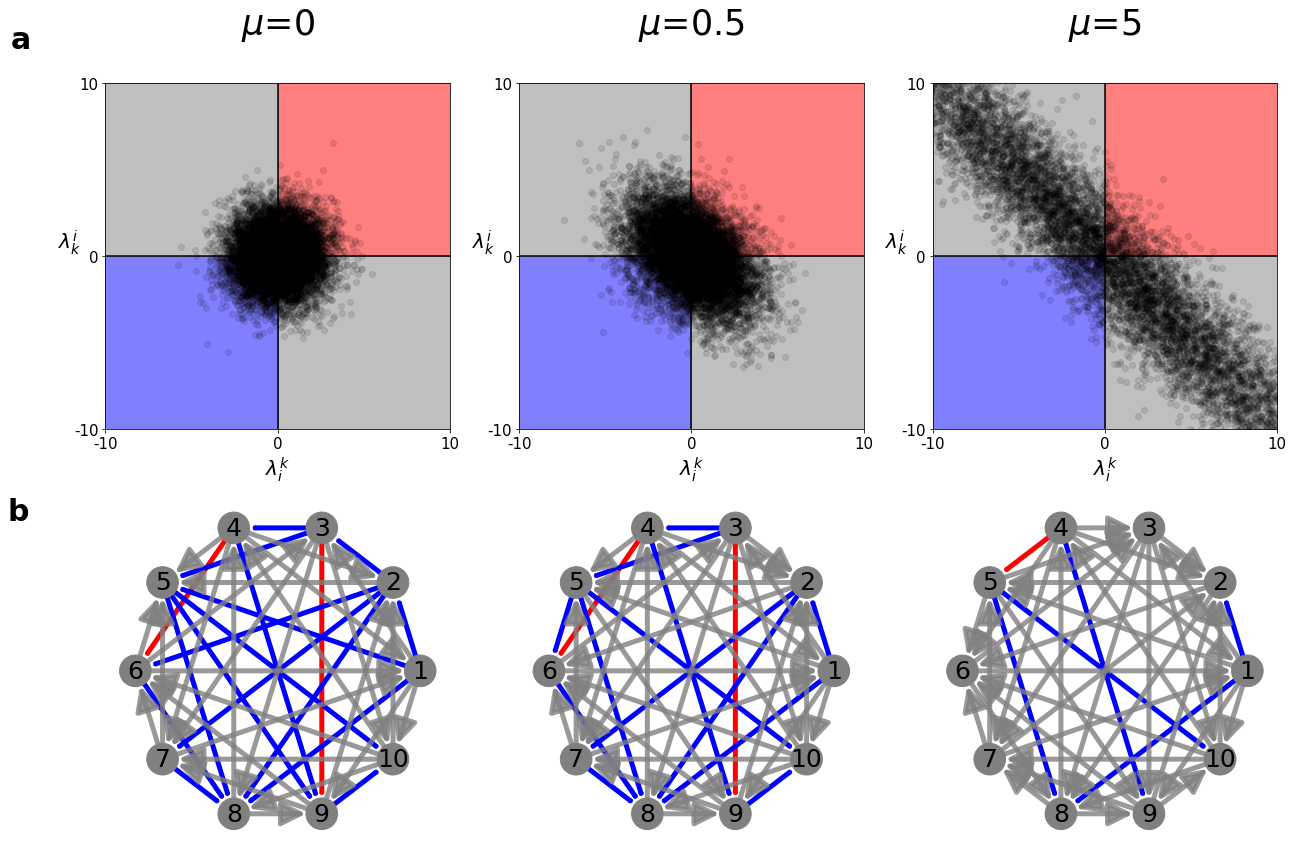

In [19]:
##code for the figure 1 of the paper##

fig,[AX1,AX2]=plt.subplots(nrows=2,ncols=3,figsize=(21,14))
MU=[0,0.5,5]
n=10

A=np.random.normal(0,1,(n,n))
for mu,ax1,ax2 in zip(MU,AX1,AX2):
    XX,YY=[],[]
    ns,nb,ne=0,0,0
    for _ in range(10000):
        A0=np.random.normal(0,1,(2,2))
        x,y=fitness_dual(A0,mu=mu)
        if x*y>0:
            if x >0 : ns+=1
            else : nb+=1
        else : ne+=1
        XX.append(x)
        YY.append(y)
    ps,pb,pe=ns/(ne+ns+nb),nb/(ne+ns+nb),ne/(ne+ns+nb)
    ax1.plot(XX,YY,'ok',alpha=0.1)   
    xylim=max(2*mu,10)
    ax1.fill([0,10,10,0],[0,0,10,10],color='red',alpha=0.5)
    ax1.fill([0,-10,-10,0],[0,0,-10,-10],color='blue',alpha=0.5)
    ax1.fill([0,-10,-10,0],[0,0,10,10],color='grey',alpha=0.5)
    ax1.fill([0,10,10,0],[0,0,-10,-10],color='grey',alpha=0.5)
    ax1.plot([0,0],[-xylim,xylim],'-k')
    ax1.plot([-xylim,xylim],[0,0],'-k')
    ax1.set_xlim([-xylim,xylim])
    ax1.set_ylim([-xylim,xylim])
    #ax1.set_title(f'$\mu$={mu}\n ({100*pe:2.0f}% of exclusion)\n',fontsize=35)
    ax1.set_title(f'$\mu$={mu}\n ',fontsize=35)
    ax1.set_xlabel('$\lambda_i^k$', fontsize= 20)
    ax1.set_ylabel('$\lambda_k^i$',fontsize=20,rotation=0)
    ticks=[-10,0,10]
    ax1.set_xticks(ticks)
    ax1.set_yticks(ticks)
    ax1.set_xticklabels([f'{u}' for u in ticks],fontsize=15)
    ax1.set_yticklabels([f'{u}' for u in ticks],fontsize=15)
    LL=fitness(A,mu);
    G=network(LL);
    net_draw(G,ax=ax2,edges_size=None,nodes=[1]*10,font_size=25);
    #ax2.set_title(f'$\mu=${mu}',fontsize=20);
AX1[0].text(-15.5,12,'a',fontsize=30,weight='bold')
AX2[0].text(-1.9,1,'b',fontsize=30,weight='bold');